<a href="https://colab.research.google.com/github/Gamaliel-Marines/ML-RandomForest-NueronalNetwork/blob/main/RandomForrest_Gamaliel_Marines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd "/content/drive/MyDrive/Advanced AI/Random Forrest"

/content/drive/MyDrive/Advanced AI/Random Forrest


In [5]:
# numpy to work with arrays
import numpy as np
import pandas as pd

from scipy.stats.mstats import winsorize
import statsmodels.api as sm
# to plot graphs
import os


import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import graphviz
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [6]:
df = pd.read_csv("bank.csv", delimiter=';')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:

df = df.drop(columns=['contact'])

# Convert numerical columns stored as strings to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
bool_columns = df.select_dtypes(include='bool').columns

df[bool_columns] = df[bool_columns].astype(int)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   job_blue-collar      4521 non-null   int64
 8   job_entrepreneur     4521 non-null   int64
 9   job_housemaid        4521 non-null   int64
 10  job_management       4521 non-null   int64
 11  job_retired          4521 non-null   int64
 12  job_self-employed    4521 non-null   int64
 13  job_services         4521 non-null   int64
 14  job_student          4521 non-null   int64
 15  job_technician       4521 non-null   int64
 16  job_unemployed       452

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,35,747,23,141,2,176,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,36,307,14,341,1,330,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,39,147,6,151,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,41,221,14,57,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
9,43,-88,17,313,1,147,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_zero = df[df['y_yes'] == 0]


num_rows_to_drop = len(df_zero) // 2
# Randomly select rows to drop
rows_to_drop = df_zero.sample(n=num_rows_to_drop, random_state=42)

# Drop the selected rows
df = df.drop(rows_to_drop.index)


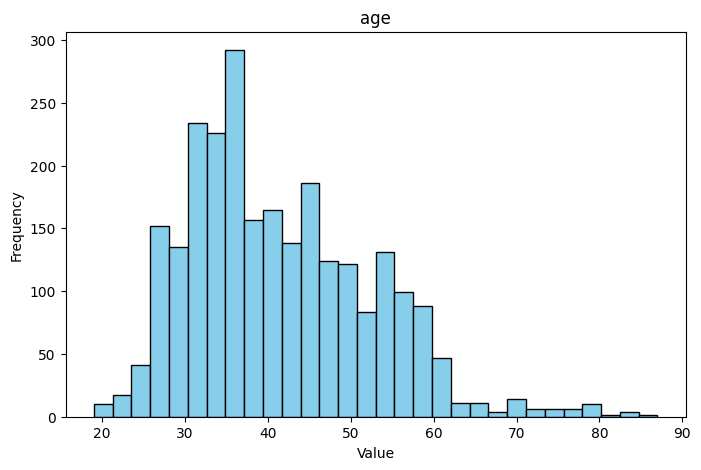

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('age')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

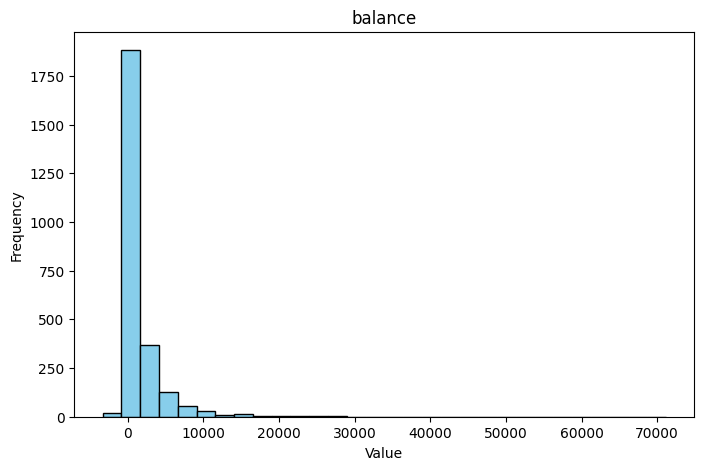

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(df['balance'], bins=30, color='skyblue', edgecolor='black')
plt.title('balance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

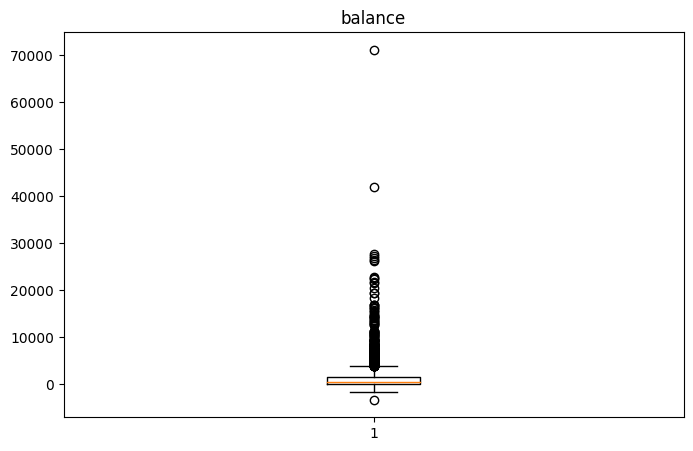

In [11]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['balance'])
plt.title('balance')
plt.show()


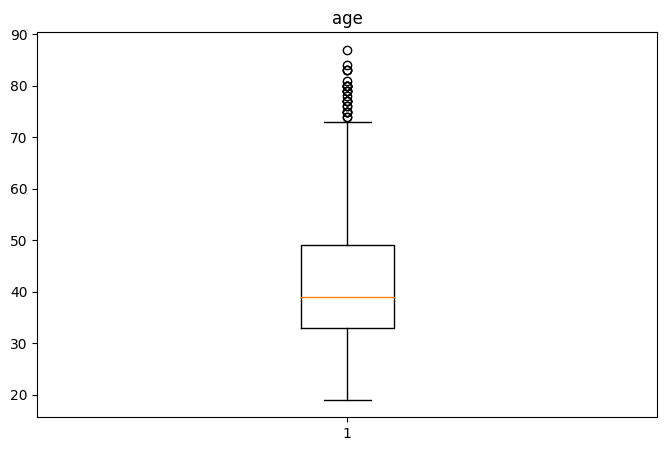

In [12]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['age'])
plt.title('age')
plt.show()


In [13]:
X = df.drop(columns=["y_yes"])  # Use all features except the target variable
y = df["y_yes"]

In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


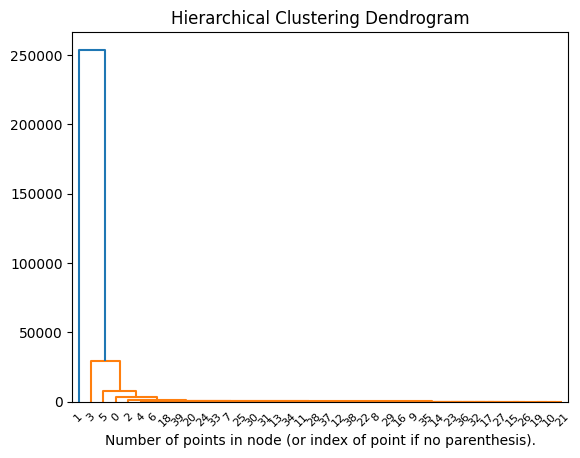

In [15]:
from sklearn.cluster import FeatureAgglomeration

# setting distance_threshold=0 ensures we compute the full tree.
model = FeatureAgglomeration(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Segunda división: 20% validación, 10% prueba (de la porción de 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Verifica los tamaños de los conjuntos
print(f'Tamaño de entrenamiento: {len(X_train)}')
print(f'Tamaño de validación: {len(X_val)}')
print(f'Tamaño de prueba: {len(X_test)}')


Tamaño de entrenamiento: 1764
Tamaño de validación: 504
Tamaño de prueba: 253


In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [34]:
# Definir el clasificador RandomForest
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=200, min_samples_split=2, max_leaf_nodes=200, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, max_leaf_nodes=200, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [35]:
# Predicciones en cada conjunto
y_pred_train = rnd_clf.predict(X_train)  # Predicciones para el conjunto de entrenamiento
y_pred_val = rnd_clf.predict(X_val)      # Predicciones para el conjunto de validación
y_pred_test = rnd_clf.predict(X_test)    # Predicciones para el conjunto de prueba

# Cálculo de las precisiones
train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Impresión de los resultados
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print(classification_report(y_test, y_pred_test))
print(classification_report(y_val, y_pred_val))
print(classification_report(y_train, y_pred_train))

Training Accuracy: 0.9841
Validation Accuracy: 0.8492
Test Accuracy: 0.8300
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       203
           1       0.62      0.36      0.46        50

    accuracy                           0.83       253
   macro avg       0.74      0.65      0.68       253
weighted avg       0.81      0.83      0.81       253

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       392
           1       0.74      0.49      0.59       112

    accuracy                           0.85       504
   macro avg       0.81      0.72      0.75       504
weighted avg       0.84      0.85      0.84       504

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1405
           1       1.00      0.92      0.96       359

    accuracy                           0.98      1764
   macro avg       0.99      0.96      0.97      176

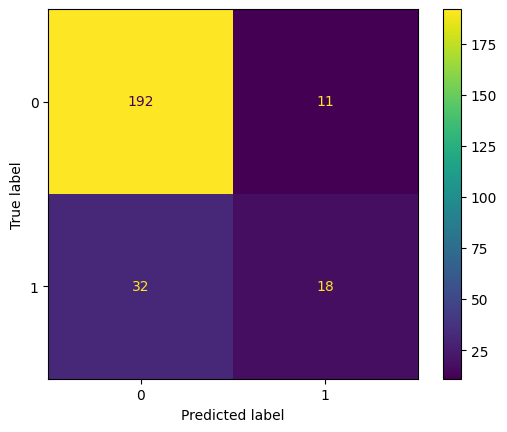

In [36]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rnd_clf.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6087 - loss: 0.7486 - val_accuracy: 0.7778 - val_loss: 0.5363
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7425 - loss: 0.5930 - val_accuracy: 0.7778 - val_loss: 0.5301
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7827 - loss: 0.5443 - val_accuracy: 0.7778 - val_loss: 0.5156
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7722 - loss: 0.5328 - val_accuracy: 0.7778 - val_loss: 0.5132
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7734 - loss: 0.5311 - val_accuracy: 0.7778 - val_loss: 0.5037
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7968 - loss: 0.5032 - val_accuracy: 0.7778 - val_loss: 0.4977
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8002 - loss: 0.5015 - val_accuracy: 0.7778 - val_loss: 0.4897
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7845 - loss: 0.5015 - val_accuracy: 0.7778 -

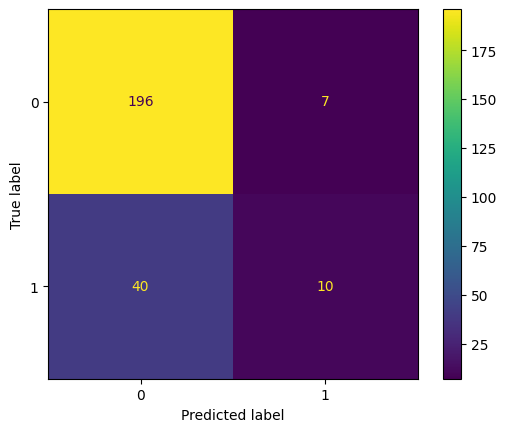

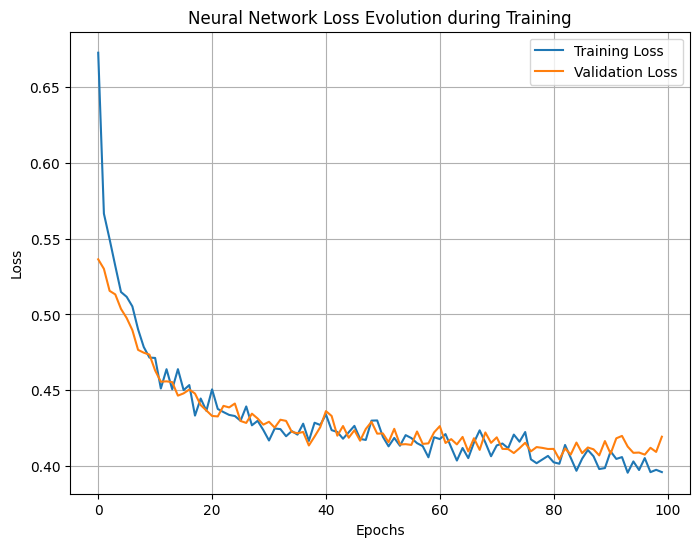


Model Comparison:
Random Forest - Test Accuracy: 0.8300
Neural Network - Test Accuracy: 0.8142


In [38]:
# Convert the target to categorical format (one-hot encoding)
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

# Define the neural network architecture with Dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='sigmoid'))  # Input layer with 64 neurons and sigmoid
model.add(Dropout(0.5))  # Apply Dropout with a rate of 50%
model.add(Dense(32, activation='sigmoid'))  # Hidden layer with 64 neurons and sigmoid
model.add(Dropout(0.5))  # Apply Dropout with a rate of 50%
model.add(Dense(2, activation='softmax'))  # Output layer with 2 neurons (for binary classification) and softmax

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_oh, epochs=100, batch_size=32, validation_data=(X_val, y_val_oh))

# Evaluate the model on test data
test_loss, nn_test_accuracy = model.evaluate(X_test, y_test_oh)
print(f"Neural Network Test Accuracy: {nn_test_accuracy:.4f}")

# Compare performance metrics
nn_y_pred_test = np.argmax(model.predict(X_test), axis=1)
nn_y_pred_val = np.argmax(model.predict(X_val), axis=1)
nn_y_pred_train = np.argmax(model.predict(X_train), axis=1)

# Calculate accuracies for the neural network
nn_train_accuracy = accuracy_score(y_train, nn_y_pred_train)
nn_val_accuracy = accuracy_score(y_val, nn_y_pred_val)
nn_test_accuracy = accuracy_score(y_test, nn_y_pred_test)

# Print neural network results
print(f"Neural Network Training Accuracy: {nn_train_accuracy:.4f}")
print(f"Neural Network Validation Accuracy: {nn_val_accuracy:.4f}")
print(f"Neural Network Test Accuracy: {nn_test_accuracy:.4f}")

print("Classification Report - Neural Network (Training Set):")
print(classification_report(y_train, nn_y_pred_train))

print("Classification Report - Neural Network (Validation Set):")
print(classification_report(y_val, nn_y_pred_val))

print("Classification Report - Neural Network (Test Set):")
print(classification_report(y_test, nn_y_pred_test))

# Confusion matrix for the neural network
nn_cm = confusion_matrix(y_test, nn_y_pred_test)
nn_disp = ConfusionMatrixDisplay(confusion_matrix=nn_cm, display_labels=[0, 1])
nn_disp.plot()
plt.show()

# Plotting the neural network loss evolution
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss Evolution during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Compare Random Forest and Neural Network results
print("\nModel Comparison:")
print(f"Random Forest - Test Accuracy: {test_accuracy:.4f}")
print(f"Neural Network - Test Accuracy: {nn_test_accuracy:.4f}")


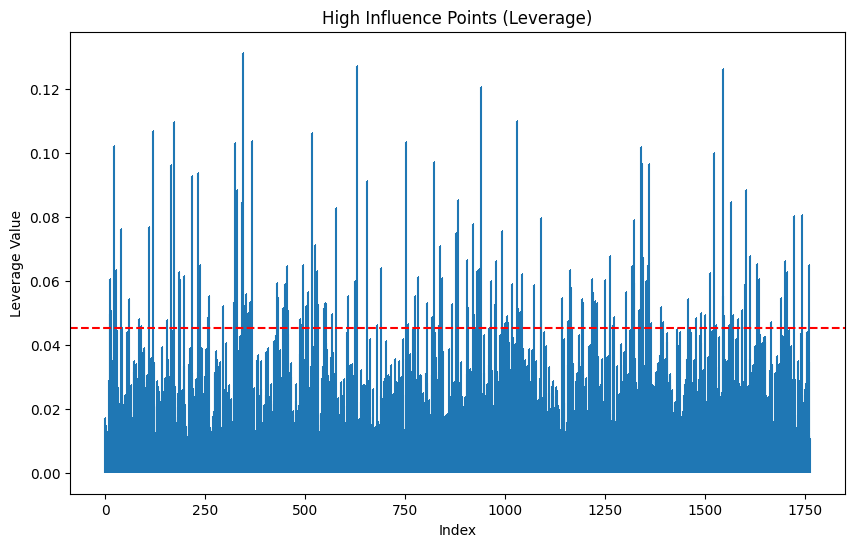

Accuracy Score: 0.83399209486166
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       203
           1       0.63      0.38      0.48        50

    accuracy                           0.83       253
   macro avg       0.75      0.66      0.69       253
weighted avg       0.82      0.83      0.82       253



In [22]:
# Function to identify outliers using IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers.index

# Function to apply winsorization
def winsorize_outliers(data, lower_limit=0.05, upper_limit=0.05):
    return winsorize(data, limits=[lower_limit, upper_limit])

# Winsorize the 'balance' column (assuming 'balance' is in the df DataFrame)
df['balance'] = winsorize_outliers(df['balance'])

# OLS Model to Calculate Leverage Points
model = sm.OLS(y_train, X_train).fit()
hat_matrix_diag = model.get_influence().hat_matrix_diag

# Calculate the leverage threshold
leverage_threshold = 2 * X_train.shape[1] / X_train.shape[0]

# Identify leverage points based on the threshold
leverage_points = X_train.index[hat_matrix_diag > leverage_threshold]

# Plotting the leverage points
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(hat_matrix_diag)), hat_matrix_diag, markerfmt=",", basefmt=" ")
plt.axhline(y=leverage_threshold, color='r', linestyle='--')
plt.title('High Influence Points (Leverage)')
plt.xlabel('Index')
plt.ylabel('Leverage Value')
plt.show()

rnd_clf = RandomForestClassifier(n_estimators=1000, max_depth=200, min_samples_split=2, max_leaf_nodes=200, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

# Make predictions
y_pred = rnd_clf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [23]:
# Predicciones en cada conjunto
y_pred_train = rnd_clf.predict(X_train)  # Predicciones para el conjunto de entrenamiento
y_pred_val = rnd_clf.predict(X_val)      # Predicciones para el conjunto de validación
y_pred_test = rnd_clf.predict(X_test)    # Predicciones para el conjunto de prueba

# Cálculo de las precisiones
train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Impresión de los resultados
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print(classification_report(y_test, y_pred_test))
print(classification_report(y_val, y_pred_val))
print(classification_report(y_train, y_pred_train))

print(rnd_clf.feature_importances_)

Training Accuracy: 0.9841
Validation Accuracy: 0.8492
Test Accuracy: 0.8340
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       203
           1       0.63      0.38      0.48        50

    accuracy                           0.83       253
   macro avg       0.75      0.66      0.69       253
weighted avg       0.82      0.83      0.82       253

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       392
           1       0.75      0.48      0.59       112

    accuracy                           0.85       504
   macro avg       0.81      0.72      0.75       504
weighted avg       0.84      0.85      0.84       504

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1405
           1       1.00      0.92      0.96       359

    accuracy                           0.98      1764
   macro avg       0.99      0.96      0.97      176